<a href="https://colab.research.google.com/github/bilal9799/prog-for-AI/blob/main/HCV_fina_lcode.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [156]:
#from google.colab import drive
#drive.mount('/content/drive')

In [157]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# New Section

In [158]:
#Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
import random
import numpy as np
from scipy.stats import pearsonr
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow import keras
#from tensorflow.keras import layers
from sklearn.model_selection import train_test_split
import plotly.express as px
from sklearn.model_selection import cross_val_score
from collections import Counter
import plotly.express as px
import plotly.graph_objects as go
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import KFold, train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import roc_auc_score, roc_curve, auc, classification_report, confusion_matrix
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline
# data preprocessing
from sklearn.preprocessing import StandardScaler
# data splitting
from sklearn.model_selection import train_test_split
#ensembling

#loading dataset
import pandas as pd
import numpy as np
#visualisation
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
#EDA
from collections import Counter
from sklearn.metrics import confusion_matrix, recall_score, precision_score, f1_score, accuracy_score
from sklearn.metrics import classification_report
# data preprocessing
from sklearn.preprocessing import StandardScaler
# data splitting
from sklearn.model_selection import train_test_split
# data modeling
from sklearn.metrics import confusion_matrix,accuracy_score,roc_curve,classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
#ensembling
#from mlxtend.classifier import StackingCVClassifier
#from sklearn.ensemble import VotingClassifier
#from sklearn.ensemble import RandomForestClassifier
#from sklearn.neighbors import KNeighborsClassifier
#from sklearn.svm import SVC
#from sklearn.neural_network import MLPClassifier
#from sklearn.ensemble import AdaBoostClassifier
#from sklearn.ensemble import GradientBoostingClassifier
#from sklearn.ensemble import ExtraTreesClassifier
#from sklearn.linear_model import LogisticRegression
#from xgboost import XGBClassifier

In [159]:
# Load in the data
import os
data = pd.read_csv('/content/drive/MyDrive/HCV.csv')
data.head()

,Unnamed: 0,Category,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
0,1,0=Blood Donor,32,m,38.5,52.5,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0
1,2,0=Blood Donor,32,m,38.5,70.3,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5
2,3,0=Blood Donor,32,m,46.9,74.7,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3
3,4,0=Blood Donor,32,m,43.2,52.0,30.6,22.6,18.9,7.33,4.74,80.0,33.8,75.7
4,5,0=Blood Donor,32,m,39.2,74.1,32.6,24.8,9.6,9.15,4.32,76.0,29.9,68.7


In [160]:
#checking for number of missing values
data.isnull().sum()

Unnamed: 0     0
Category       0
Age            0
Sex            0
ALB            1
ALP           18
ALT            1
AST            0
BIL            0
CHE            0
CHOL          10
CREA           0
GGT            0
PROT           1
dtype: int64

In [161]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 615 entries, 0 to 614
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  615 non-null    int64  
 1   Category    615 non-null    object 
 2   Age         615 non-null    int64  
 3   Sex         615 non-null    object 
 4   ALB         614 non-null    float64
 5   ALP         597 non-null    float64
 6   ALT         614 non-null    float64
 7   AST         615 non-null    float64
 8   BIL         615 non-null    float64
 9   CHE         615 non-null    float64
 10  CHOL        605 non-null    float64
 11  CREA        615 non-null    float64
 12  GGT         615 non-null    float64
 13  PROT        614 non-null    float64
dtypes: float64(10), int64(2), object(2)
memory usage: 67.4+ KB


In [162]:
#Descriptive statistics
data.describe()

,Unnamed: 0,Age,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
count,615.000000,615.000000,614.000000,597.000000,614.000000,615.000000,615.000000,615.000000,605.000000,615.000000,615.000000,614.000000
mean,308.000000,47.408130,41.620195,68.283920,28.450814,34.786341,11.396748,8.196634,5.368099,81.287805,39.533171,72.044137
std,177.679487,10.055105,5.780629,26.028315,25.469689,33.090690,19.673150,2.205657,1.132728,49.756166,54.661071,5.402636
min,1.000000,19.000000,14.900000,11.300000,0.900000,10.600000,0.800000,1.420000,1.430000,8.000000,4.500000,44.800000
25%,154.500000,39.000000,38.800000,52.500000,16.400000,21.600000,5.300000,6.935000,4.610000,67.000000,15.700000,69.300000
50%,308.000000,47.000000,41.950000,66.200000,23.000000,25.900000,7.300000,8.260000,5.300000,77.000000,23.300000,72.200000
75%,461.500000,54.000000,45.200000,80.100000,33.075000,32.900000,11.200000,9.590000,6.060000,88.000000,40.200000,75.400000
max,615.000000,77.000000,82.200000,416.600000,325.300000,324.000000,254.000000,16.410000,9.670000,1079.100000,650.900000,90.000000


In [163]:
#Model preparation
# Model preparation
y = data["Category"]
X = data.drop('Category', axis=1)

In [164]:
data = data.drop(columns=['Sex'])
y = data["Category"]
X = data.drop('Category', axis=1)

In [165]:
# Inspect the data
#data.info()
#data.describe()

# Identify and handle non-numeric columns
# For example, if 'Sex' column contains non-numeric values
#X_train = pd.DataFrame(X_train)

#X_test = X_test.drop(columns=['Sex'])  # Ensure that the same columns are dropped from both X_train and X_test

# Re-fit the StandardScaler
#scaler = StandardScaler()
#X_train = scaler.fit_transform(X_train)
#X_test = scaler.transform(X_test)

In [166]:
#Validation 80-20
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state = 42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Before applying algorithm we should check whether the data is equally splitted or not, because if data is not splitted equally it will cause for data imbalacing problem

In [167]:
print(y_test.unique())
Counter(y_train)

['0=Blood Donor' '3=Cirrhosis' '1=Hepatitis' '2=Fibrosis'
 '0s=suspect Blood Donor']


Counter({'0=Blood Donor': 437,
         '2=Fibrosis': 15,
         '3=Cirrhosis': 21,
         '1=Hepatitis': 15,
         '0s=suspect Blood Donor': 4})

In [168]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='mean')
X_train = imputer.fit_transform(X_train)

In [169]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='mean')
X_test = imputer.fit_transform(X_test)
# Now you can fit and predict using the Logistic Regression model
lr.fit(X_train, y_train)
lr_predict = lr.predict(X_test)

                               **Logistic Regressin**

In [170]:
#ML models
from sklearn.metrics import confusion_matrix,accuracy_score,roc_curve,classification_report
m1 = 'Logistic Regression'
lr = LogisticRegression()
# Fit the Logistic Regression model
lr.fit(X_train, y_train)

# Make predictions on the test data
lr_predict = lr.predict(X_test)

# Calculate the confusion matrix and accuracy score
lr_conf_matrix = confusion_matrix(y_test, lr_predict)
lr_acc_score = accuracy_score(y_test, lr_predict)

# Print the results
print("Confusion Matrix:")
print(lr_conf_matrix)
print("\n")
print("Accuracy of Logistic Regression:", lr_acc_score * 100, "\n")
print(classification_report(y_test, lr_predict))
lr_predict = lr.predict(X_test)
lr_conf_matrix = confusion_matrix(y_test, lr_predict)
lr_acc_score = accuracy_score(y_test, lr_predict)
print("confussion matrix")
print(lr_conf_matrix)
print("\n")
print("Accuracy of Logistic Regression:",lr_acc_score*100,'\n')
print(classification_report(y_test,lr_predict))

Confusion Matrix:
[[96  0  0  0  0]
 [ 0  2  0  1  0]
 [ 0  0  7  2  0]
 [ 3  0  0  3  0]
 [ 1  1  0  2  5]]


Accuracy of Logistic Regression: 91.869918699187 

                        precision    recall  f1-score   support

         0=Blood Donor       0.96      1.00      0.98        96
0s=suspect Blood Donor       0.67      0.67      0.67         3
           1=Hepatitis       1.00      0.78      0.88         9
            2=Fibrosis       0.38      0.50      0.43         6
           3=Cirrhosis       1.00      0.56      0.71         9

              accuracy                           0.92       123
             macro avg       0.80      0.70      0.73       123
          weighted avg       0.93      0.92      0.92       123

confussion matrix
[[96  0  0  0  0]
 [ 0  2  0  1  0]
 [ 0  0  7  2  0]
 [ 3  0  0  3  0]
 [ 1  1  0  2  5]]


Accuracy of Logistic Regression: 91.869918699187 

                        precision    recall  f1-score   support

         0=Blood Donor       0.9

                                  **NAIVE BAIYES**

In [171]:
from sklearn.metrics import confusion_matrix,accuracy_score,roc_curve,classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
m2 = 'Naive Bayes'
nb = GaussianNB()
nb.fit(X_train,y_train)
nbpred = nb.predict(X_test)
nb_conf_matrix = confusion_matrix(y_test, nbpred)
nb_acc_score = accuracy_score(y_test, nbpred)
print("confussion matrix")
print(nb_conf_matrix)
n=1
print("\n")
print("Accuracy of Naive Bayes model:",nb_acc_score*100,'\n')
print(classification_report(y_test,nbpred))


confussion matrix
[[96  0  0  0  0]
 [ 0  2  1  0  0]
 [ 2  0  6  0  1]
 [ 1  0  0  5  0]
 [ 1  0  0  1  7]]


Accuracy of Naive Bayes model: 94.3089430894309 

                        precision    recall  f1-score   support

         0=Blood Donor       0.96      1.00      0.98        96
0s=suspect Blood Donor       1.00      0.67      0.80         3
           1=Hepatitis       0.86      0.67      0.75         9
            2=Fibrosis       0.83      0.83      0.83         6
           3=Cirrhosis       0.88      0.78      0.82         9

              accuracy                           0.94       123
             macro avg       0.91      0.79      0.84       123
          weighted avg       0.94      0.94      0.94       123



                                      **RANDOM FOREST**

In [172]:
m3 = 'Random Forest Classfier'
rf = RandomForestClassifier(n_estimators=n, random_state=2,max_depth=5)
rf.fit(X_train,y_train)
rf_predicted = rf.predict(X_test)
rf_conf_matrix = confusion_matrix(y_test, rf_predicted)
rf_acc_score = accuracy_score(y_test, rf_predicted)
print("confussion matrix")
print(rf_conf_matrix)
print("\n")
print("Accuracy of Random Forest:",rf_acc_score*100,'\n')
print(classification_report(y_test,rf_predicted))

confussion matrix
[[96  0  0  0  0]
 [ 1  1  1  0  0]
 [ 0  0  7  2  0]
 [ 0  0  1  5  0]
 [ 0  0  0  4  5]]


Accuracy of Random Forest: 92.6829268292683 

                        precision    recall  f1-score   support

         0=Blood Donor       0.99      1.00      0.99        96
0s=suspect Blood Donor       1.00      0.33      0.50         3
           1=Hepatitis       0.78      0.78      0.78         9
            2=Fibrosis       0.45      0.83      0.59         6
           3=Cirrhosis       1.00      0.56      0.71         9

              accuracy                           0.93       123
             macro avg       0.84      0.70      0.72       123
          weighted avg       0.95      0.93      0.93       123



                            **SUPPORT VECTOR CLASSIFIER**

In [173]:
m7 = 'Support Vector Classifier'
svc =  SVC(kernel='linear', C=2)
svc.fit(X_train, y_train)
svc_predicted = svc.predict(X_test)
svc_conf_matrix = confusion_matrix(y_test, svc_predicted)
svc_acc_score = accuracy_score(y_test, svc_predicted)
print("confussion matrix")
print(svc_conf_matrix)
print("\n")
print("Accuracy of Support Vector Classifier:",svc_acc_score*100,'\n')
print(classification_report(y_test,svc_predicted))

confussion matrix
[[96  0  0  0  0]
 [ 1  2  0  0  0]
 [ 0  0  5  4  0]
 [ 2  0  0  4  0]
 [ 1  1  4  1  2]]


Accuracy of Support Vector Classifier: 88.6178861788618 

                        precision    recall  f1-score   support

         0=Blood Donor       0.96      1.00      0.98        96
0s=suspect Blood Donor       0.67      0.67      0.67         3
           1=Hepatitis       0.56      0.56      0.56         9
            2=Fibrosis       0.44      0.67      0.53         6
           3=Cirrhosis       1.00      0.22      0.36         9

              accuracy                           0.89       123
             macro avg       0.73      0.62      0.62       123
          weighted avg       0.90      0.89      0.87       123



In [174]:
unique_classes = np.unique(y_train)
print(f"Unique classes in y_train: {unique_classes}")

Unique classes in y_train: ['0=Blood Donor' '0s=suspect Blood Donor' '1=Hepatitis' '2=Fibrosis'
 '3=Cirrhosis']


In [175]:
m6 = 'DecisionTreeClassifier'
dt = DecisionTreeClassifier(criterion = 'entropy',random_state=0,max_depth = 3)
dt.fit(X_train, y_train)
dt_predicted = dt.predict(X_test)
dt_conf_matrix = confusion_matrix(y_test, dt_predicted)
dt_acc_score = accuracy_score(y_test, dt_predicted)
print("confussion matrix")
print(dt_conf_matrix)
print("\n")
print("Accuracy of DecisionTreeClassifier:",dt_acc_score*100,'\n')
print(classification_report(y_test,dt_predicted))

confussion matrix
[[96  0  0  0  0]
 [ 0  0  3  0  0]
 [ 0  0  9  0  0]
 [ 0  0  0  6  0]
 [ 0  0  0  1  8]]


Accuracy of DecisionTreeClassifier: 96.7479674796748 

                        precision    recall  f1-score   support

         0=Blood Donor       1.00      1.00      1.00        96
0s=suspect Blood Donor       0.00      0.00      0.00         3
           1=Hepatitis       0.75      1.00      0.86         9
            2=Fibrosis       0.86      1.00      0.92         6
           3=Cirrhosis       1.00      0.89      0.94         9

              accuracy                           0.97       123
             macro avg       0.72      0.78      0.74       123
          weighted avg       0.95      0.97      0.96       123



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [176]:
model_ev = pd.DataFrame({'Model': ['Logistic Regression','Naive Bayes','Random Forest',
                    'Decision Tree','Support Vector Machine'], 'Accuracy': [lr_acc_score*100,
                    nb_acc_score*100,rf_acc_score*100,dt_acc_score*100,svc_acc_score*100]})
model_ev

,Model,Accuracy
0,Logistic Regression,91.869919
1,Naive Bayes,94.308943
2,Random Forest,92.682927
3,Decision Tree,96.747967
4,Support Vector Machine,88.617886


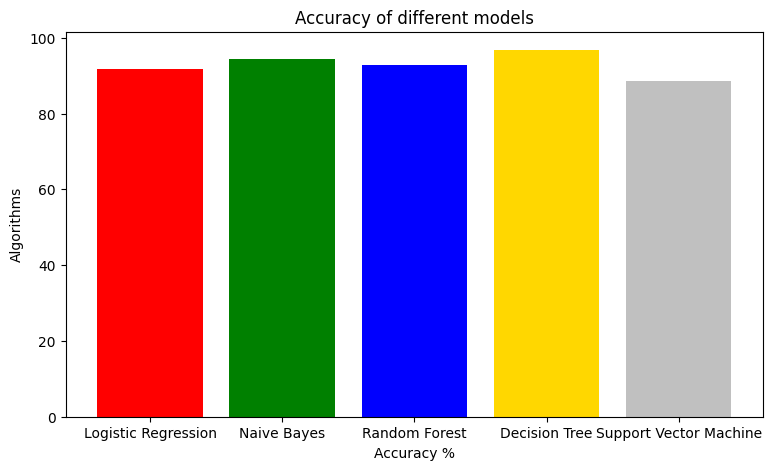

In [177]:
colors = ['red','green','blue','gold','silver','yellow','orange',]
plt.figure(figsize=(9,5))
plt.title("Accuracy of different models")
plt.xlabel("Accuracy %")
plt.ylabel("Algorithms")
plt.bar(model_ev['Model'],model_ev['Accuracy'],color = colors)
plt.show()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


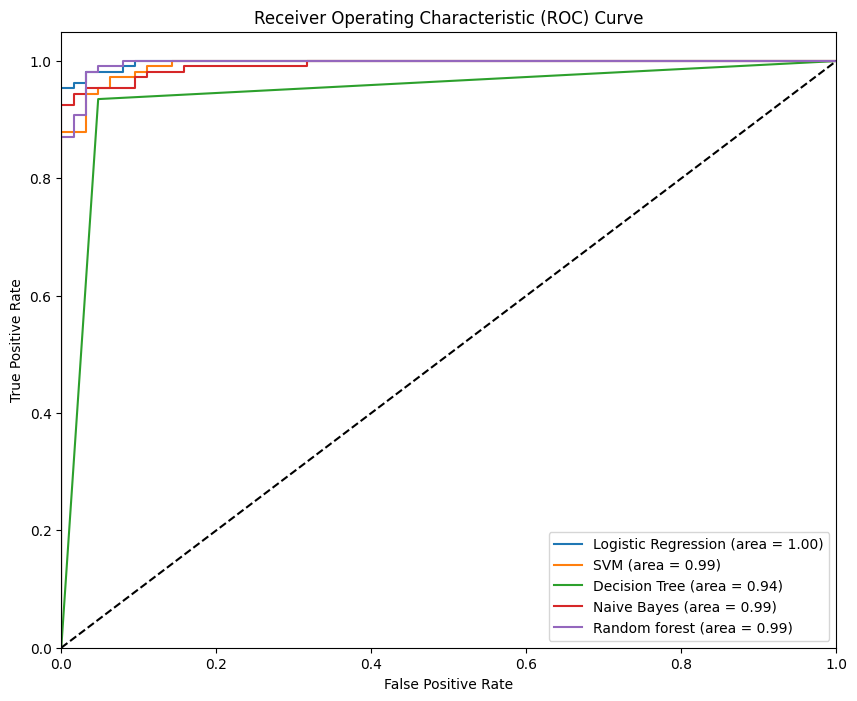

In [187]:
import matplotlib.pyplot as plt
from google.colab import drive
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, roc_auc_score

## Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Load dataset from Google Drive (adjust the path to your dataset)
file_path = '/content/drive/My Drive/HCV.csv'
data = pd.read_csv(file_path)
# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize the classifiers
logreg = LogisticRegression(max_iter=10000)
svm = SVC(probability=True)
dt = DecisionTreeClassifier()
rf = RandomForestClassifier()
nb = GaussianNB()

# Train the classifiers
logreg.fit(X_train, y_train)
svm.fit(X_train, y_train)
dt.fit(X_train, y_train)
rf.fit(X_train,y_train)
nb.fit(X_train, y_train)

# Predict probabilities
y_prob_logreg = logreg.predict_proba(X_test)[:, 1]
y_prob_svm = svm.predict_proba(X_test)[:, 1]
y_prob_dt = dt.predict_proba(X_test)[:, 1]
y_prob_rf = rf.predict_proba(X_test)[:,1]
y_prob_nb = nb.predict_proba(X_test)[:, 1]

# Compute ROC curve and ROC area
fpr_logreg, tpr_logreg, _ = roc_curve(y_test, y_prob_logreg)
fpr_svm, tpr_svm, _ = roc_curve(y_test, y_prob_svm)
fpr_rf,tpr_rf,_=roc_curve(y_test,y_prob_rf)
fpr_dt, tpr_dt, _ = roc_curve(y_test, y_prob_dt)
fpr_nb, tpr_nb, _ = roc_curve(y_test, y_prob_nb)

roc_auc_logreg = roc_auc_score(y_test, y_prob_logreg)
roc_auc_svm = roc_auc_score(y_test, y_prob_svm)
roc_auc_dt = roc_auc_score(y_test, y_prob_dt)
roc_auc_rf=roc_auc_score(y_test,y_prob_rf)
roc_auc_nb = roc_auc_score(y_test, y_prob_nb)

# Plot ROC curves
plt.figure(figsize=(10, 8))
plt.plot(fpr_logreg, tpr_logreg, label='Logistic Regression (area = %0.2f)' % roc_auc_logreg)
plt.plot(fpr_svm, tpr_svm, label='SVM (area = %0.2f)' % roc_auc_svm)
plt.plot(fpr_dt, tpr_dt, label='Decision Tree (area = %0.2f)' % roc_auc_dt)
plt.plot(fpr_nb, tpr_nb, label='Naive Bayes (area = %0.2f)' % roc_auc_nb)
plt.plot(fpr_rf, tpr_rf, label='Random forest (area = %0.2f)' % roc_auc_nb)

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()
